In [9]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Create COVID-19 confirmed cases DF
covid_dataset_csv = pd.read_csv('covid19_Confirmed_dataset.csv')
covid_dataset_csv.drop(['Lat', 'Long'], axis = 1, inplace=True)
df_covid = covid_dataset_csv.groupby('Country/Region').sum()
display(df_covid)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


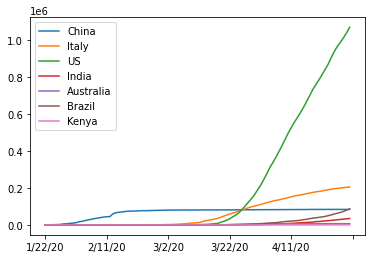

In [11]:
# displays the number of confirmed cases every day over a 3 month period
df_covid.loc['China'].plot()
df_covid.loc['Italy'].plot()
df_covid.loc['US'].plot()
df_covid.loc['India'].plot()
df_covid.loc['Australia'].plot()
df_covid.loc['Brazil'].plot()
df_covid.loc['Kenya'].plot()
plt.legend()

In [12]:
# Max number of infections in 1 day
# df_covid.loc['China'].diff().max()
# df_covid.loc['Italy'].diff().max()
df_covid.loc['US'].diff().max()
# df_covid.loc['India'].diff().max()
# df_covid.loc['Australia'].diff().max()
# df_covid.loc['Brazil'].diff().max()
# df_covid.loc['Kenya'].diff().max()

36188.0

In [13]:
countries = list(df_covid.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(df_covid.loc[c].diff().max())
df_covid['max infection rate'] = max_infection_rates

covid_data = pd.DataFrame(df_covid['max infection rate'])
display(covid_data)

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [14]:
# reads CSV file, drops unrelated columns
happiness_report_csv = pd.read_csv('worldwide_happiness_report.csv')
happiness_report_csv.drop(['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)

# sets the index to be the Country or region, rather than a number
happiness_report_csv.set_index('Country or region', inplace=True)

# joins the COVID cases dataset with the world happiness report dataset
df = covid_data.join(happiness_report_csv, how='inner')

# graphically displays the correlation between COVID cases and characteristics of the most developed countries
df.corr()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max infection rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:xlabel='GDP per capita', ylabel='max infection rate'>

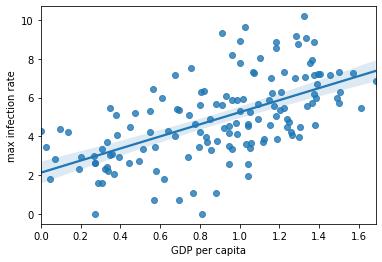

In [16]:
# Plotting GDP vs. number of max infections
x1 = df['GDP per capita']
y1 = df['max infection rate']
sns.regplot(x1, np.log(y1))


<AxesSubplot:xlabel='Social support', ylabel='max infection rate'>

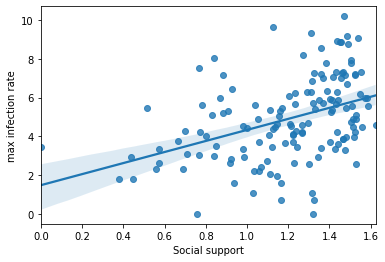

In [17]:
# Plotting Social support vs. number of max infections
x2 = df['Social support']
y2 = df['max infection rate']
sns.regplot(x2, np.log(y2))


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max infection rate'>

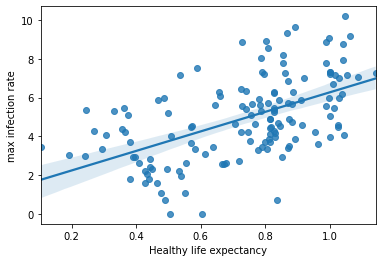

In [18]:
# Plotting Healthy life expectancy vs. number of max infections
x3 = df['Healthy life expectancy']
y3 = df['max infection rate']
sns.regplot(x3, np.log(y3))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max infection rate'>

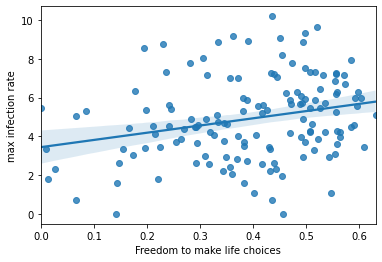

In [19]:
# Plotting Freedom to make life choices vs. number of max infections
x4 = df['Freedom to make life choices']
y4 = df['max infection rate']
sns.regplot(x4, np.log(y4))